In [1]:
# Initialization cell
try:  # for CS1302 JupyterLite pyodide kernel
    import piplite

    with open("requirements.txt") as f:
        for package in f:
            package = package.strip()
            print("Installing", package)
            await piplite.install(package)
except ModuleNotFoundError:
    pass

import math
from math import cos, exp, log, pi, sin, tan

import jsxgraphs
import jupytext
import matplotlib.pyplot as plt
import numpy as np
import otter
import sympy as sp
from ipywidgets import interact

grader = otter.Notebook("main.ipynb")
# interactive plot with ipympl
%matplotlib widget

# Lab 2

**CS1302 Introduction to Computer Programming**
___

For this lab, you will create different calculators. We will first show you a demo. Then, it will be your turn to create the calculators.

## Hypotenuse Calculator

---

**Proposition** 

By the Pythagoras theorem, given a right-angled triangle,

![Right-angled triangle](images/pythagoras.dio.svg)

the length of the hypotenuse is

$$
c = \sqrt{a^2 + b^2}
$$ (hypotenuse)

where $a$ and $b$ are the lengths of the other sides of the triangle.

---

You can verify the theorem using the JSXGraph app below:

In [2]:
jsxgraphs.pythagorean1

JSWidget(value=None, height=600, html='<!DOCTYPE html>\n<html>\n    <head>\n    <style>\n    html, body {\n   …

```{seealso}
We developed `divewidgets` to run the Javascript library [JSXGraph](https://jsxgraph.uni-bayreuth.de/). You can click the button `scratch` to show and edit the Javascript code. Other mathematical illustrations created using `divewidgets` can be found [here](https://dive4dec.github.io/lab/?path=divemath%2Fdivemath.ipynb) and will be presented in an upcoming [JSXGraph conference open to the public](https://jsxgraph.uni-bayreuth.de/conf2022/registration/).
```

The following is an interactive graphical proof:

In [3]:
jsxgraphs.pythagorean2

JSWidget(value=None, height=600, html='<!DOCTYPE html>\n<html>\n    <head>\n    <style>\n    html, body {\n   …

Another interactive proof is as follows:

In [4]:
jsxgraphs.pythagorean3

JSWidget(value=None, height=600, html='<!DOCTYPE html>\n<html>\n    <head>\n    <style>\n    html, body {\n   …

We can define the following function to calculate the length `c` of the hypotenuse when given the lengths `a` and `b` of the other sides: 

In [5]:
def length_of_hypotenuse(a, b):
    c = (a**2 + b**2) ** (0.5)  # Pythagoras
    return c

```{note}

In the above code,
- the formula {eq}`hypotenuse` is written as a python expression using the exponentiation operator `**`, and
- the variable `c` is assigned to the value of the expression using the assignment operator `=`.

```

For example, you may be asked to write Line 2, while Line 1 and 3 are given to you:

**Exercise** 

Complete the function below to return the length `c` of the hypotenuse given the lengths `a` and `b`.

```{caution}

- You should still complete this exercise to get the credit even though the answer was already revealed as a demo. Instead of copy-and-paste the answer, type it yourself.
- Note that indentation affects the execution of python code. In particular, the assignment statement must be indented to indicate that it is part of the *body* of the function. 
```

In [6]:
def length_of_hypotenuse(a, b):
    # math.sqrt fail public test
    c = (a ** 2 + b ** 2) ** 0.5
    return c

In [7]:
grader.check("length_of_hypotenuse")

length_of_hypotenuse results: All test cases passed!

We will use `ipywidgets` to let user interact with the calculator more easily:

- After running the cell, move the sliders to change the values of `a` and `b`. 
- Observer that the value of `c` is updated immediately.

In [8]:
# hypotenuse calculator
@interact(a=(0, 10, 1), b=(0, 10, 1))
def calculate_hypotenuse(a=3, b=4):
    print("c: {:.2f}".format(length_of_hypotenuse(a, b)))

interactive(children=(IntSlider(value=3, description='a', max=10), IntSlider(value=4, description='b', max=10)…

```{note}

The hypotenuse is printed up to 2 decimal places using the format specification `{:.2f}`.

```

You can check your code with a few cases listed in the test cell below.

## Quadratic equation

### Graphical calculator for parabola

---

**Definition** Parabola


The collection of points $(x,y)$ satisfying the following equation forms a *parabola*:

$$
y=ax^2+bx+c
$$ (parabola)

where $a$, $b$, and $c$ are real numbers called the *coefficients*.

---

The following plots the parabola with difference choices of coefficients. 

In [9]:
jsxgraphs.parabola

JSWidget(value=None, height=600, html='<!DOCTYPE html>\n<html>\n    <head>\n    <style>\n    html, body {\n   …

**Exercise** 

Given the variables `x`, `a`, `b`, and `c` store the $x$-coordinate and the coefficients $a$, $b$, and $c$ respectively, assign `y` the corresponding $y$-coordinate of the parabola {eq}`parabola`.

In [10]:
def get_y(x, a, b, c):
    y = a * (x ** 2) + b * x + c
    return y

To test your code:

In [11]:
grader.check("parabola")

parabola results: All test cases passed!

To run the graphical calculator:

interactive(children=(IntSlider(value=0, description='a', max=10, min=-10), IntSlider(value=0, description='b'…

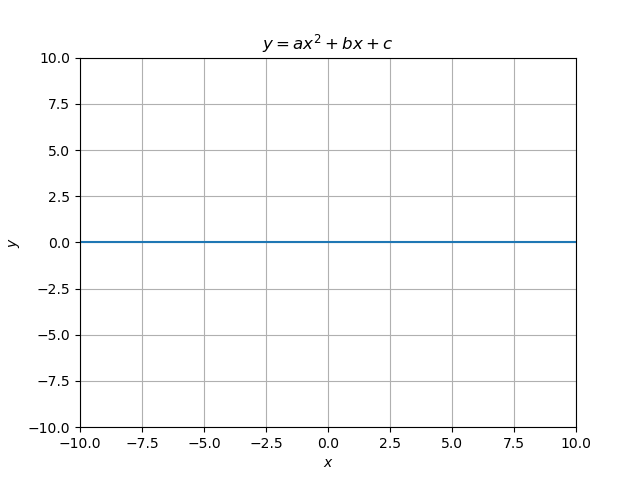

In [12]:
# graphical calculator for parabola
fig, ax = plt.subplots()
xmin, xmax, ymin, ymax, resolution = -10, 10, -10, 10, 50
x = np.linspace(xmin, xmax, resolution)
ax.set_title(r"$y=ax^2+bx+c$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.grid()
(p,) = ax.plot(x, get_y(x, 0, 0, 0))


@interact(a=(-10, 10, 1), b=(-10, 10, 1), c=(-10, 10, 1))
def plot_parabola(a, b, c):
    p.set_ydata(get_y(x, a, b, c))

### Quadratic equation solver

![quadratic-equation-solver](images/quadratic.dio.svg)

---

**Proposition**

For the quadratic equation

$$
ax^2+bx+c=0,
$$ (quadratic)
the *roots* (solutions for $x$) are give by

$$
\frac{-b-\sqrt{b^2-4ac}}{2a},\frac{-b+\sqrt{b^2-4ac}}{2a}.
$$ (quadratic_roots)

---

**Exercise** 

Assign to `root1` and `root2` the values of the first and second roots above respectively.

In [13]:
def get_roots(a, b, c):
    delta = b ** 2 - 4 * a * c
    root1 = (-b - delta ** 0.5) / (2 * a)
    root2 = (-b + delta ** 0.5) / (2 * a)
    return root1, root2

To test your code:

In [14]:
grader.check("roots")

roots results: All test cases passed!

To run the calculator:

In [15]:
# quadratic equations solver
@interact(a=(-10, 10, 1), b=(-10, 10, 1), c=(-10, 10, 1))
def quadratic_equation_solver(a=1, b=2, c=1):
    print("Roots: {}, {}".format(*get_roots(a, b, c)))

interactive(children=(IntSlider(value=1, description='a', max=10, min=-10), IntSlider(value=2, description='b'…

## Number conversion

### Byte-to-Decimal calculator

![byte-to-decimal](images/byte-to-decimal.dio.svg)

Denote a binary number stored in a byte ($8$ bits) as

$$ 
b_7\circ b_6\circ b_5\circ b_4\circ b_3\circ b_2\circ b_1\circ b_0, 
$$
where $\circ$ concatenates $b_i$'s together into a binary string.

The binary string can be converted to a decimal number by the formula

$$ 
b_7\cdot 2^7 + b_6\cdot 2^6 + b_5\cdot 2^5 + b_4\cdot 2^4 + b_3\cdot 2^3 + b_2\cdot 2^2 + b_1\cdot 2^1 + b_0\cdot 2^0. 
$$

E.g., the binary string `'11111111'` is the largest integer represented by a byte:

$$
2^7+2^6+2^5+2^4+2^3+2^2+2^1+2^0=255=2^8-1.
$$

**Exercise** 

Assign to `decimal` the *integer* value represented by the binary sequence `b7,b6,b5,b4,b3,b2,b1,b0` of *characters* `'0'` or `'1'`.

In [16]:
def byte_to_decimal(b7, b6, b5, b4, b3, b2, b1, b0):
    """
    Parameters
    ----------
    b7, ..., b0: single characters either '0' or '1'.
    """
    o = lambda b: ord(b) - 48
    decimal = (o(b7) << 7) + (o(b6) << 6) + (o(b5) << 5) + (o(b4) << 4) + \
        (o(b3) << 3) + (o(b2) << 2) + (o(b1) << 1) + o(b0)
    return decimal

To test your code:

In [17]:
grader.check("byte_to_decimal")

byte_to_decimal results: All test cases passed!

To run the calculator:

In [18]:
# byte-to-decimal calculator
bit = ["0", "1"]


@interact(b7=bit, b6=bit, b5=bit, b4=bit, b3=bit, b2=bit, b1=bit, b0=bit)
def convert_byte_to_decimal(b7, b6, b5, b4, b3, b2, b1, b0):
    print("decimal:", byte_to_decimal(b7, b6, b5, b4, b3, b2, b1, b0))

interactive(children=(Dropdown(description='b7', options=('0', '1'), value='0'), Dropdown(description='b6', op…

### Decimal-to-Byte calculator

![decimal-to-byte](images/decimal-to-byte.dio.svg)

**Exercise** Assign to `byte` a *string of 8 bits* that represents the value of `decimal`, a non-negative decimal integer from $0$ to $2^8-1=255$.  

```{hint}

Use the operators `//` and `%`.

```

In [19]:
def decimal_to_byte(decimal):
    byte = ""
    for i in range(8):
        byte = chr((decimal & 1) + 48) + byte
        decimal >>= 1
    return byte

To test your code:

In [20]:
grader.check("decimal_to_byte")

decimal_to_byte results: All test cases passed!

To run the calculator:

In [21]:
# decimal-to-byte calculator
@interact(decimal=(0, 255, 1))
def convert_decimal_to_byte(decimal=0):
    print("byte:", decimal_to_byte(decimal))

interactive(children=(IntSlider(value=0, description='decimal', max=255), Output()), _dom_classes=('widget-int…

## Symbolic calculators

Can we do complicated arithmetics with python. What about Calculus?  

$$
\int \tan(x)\, dx = \color{red}{?}
$$

Try [SymPy Gamma](https://gamma.sympy.org/input/?i=integrate%28tan%28x%29%29) or [SymPy Beta](https://sympy-beta.vercel.app/input/integrate%28tan%28x%29%29).

```{tip}

- Take a look at the different panels to learn about the solution: `Steps`, `Plot`, and `Derivative`.
- Try different [random examples](https://gamma.sympy.org/).

```

**How does SymPy Gamma work?**

- [SymPy Gamma](https://gamma.sympy.org/) is a web application running [SymPy](https://docs.sympy.org/latest/index.html), which is a python library for symbolic computation.
- [SymPy Beta](https://github.com/eagleoflqj/sympy_beta) is a fork of SymPy Gamma that can run totally in the browser.

**How to use SymPy?**

The following line in the initialization cell imports the library:

```python
import sympy as sp
```

We need to define a symbolic variable and assign it to a python variable.

In [22]:
x = sp.symbols("x")
x

x

The SymPy expression for $\tan(x)$ is:

In [23]:
f = sp.tan(x)
f

tan(x)

To compute the integration:

$$
\int f(x) dx
$$

In [24]:
g = sp.integrate(f)
g

-log(cos(x))

To compute the derivative:

$$
\frac{d}{dx}g(x)
$$

In [25]:
diff_g = sp.diff(g)
diff_g

sin(x)/cos(x)

The answer can be simplified as expected:

In [26]:
diff_g.simplify()

tan(x)

To plot the functions:

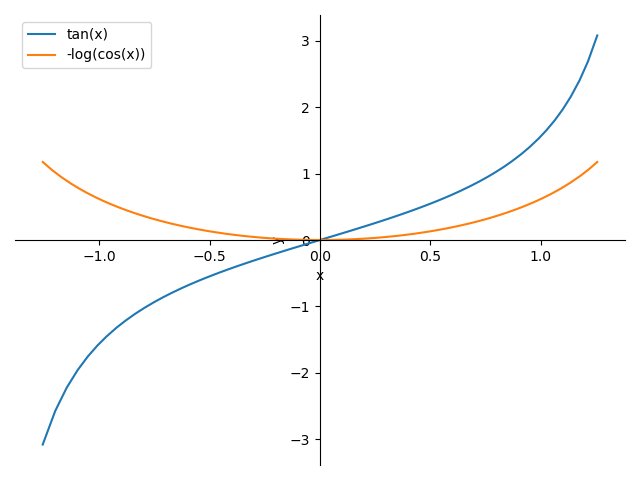

In [27]:
p = sp.plot(f, g, (x, -2 * sp.pi / 5, 2 * sp.pi / 5), ylabel="y", legend=True)

**Exercise**

Using SymPy expressions

- assign to `x` a SymPy variable named `"x"`,
- assign to `f` the expression $\frac{1}{\sqrt{1 - x^2}}$ in terms of `x`,
- assign to `g` the result of $\int \frac{1}{\sqrt{1 - x^2}} dx$, and
- *optionally*, plot `f` and `g` for $x\in \left[-\frac45, \frac45\right]$.

```{caution}

Use `sp.sqrt` or `**(sp.S(1)/2)` for square root instead of `**0.5`. See [SymPy gotchas](https://docs.sympy.org/latest/gotchas.html).

```

In [28]:
import sympy as sp

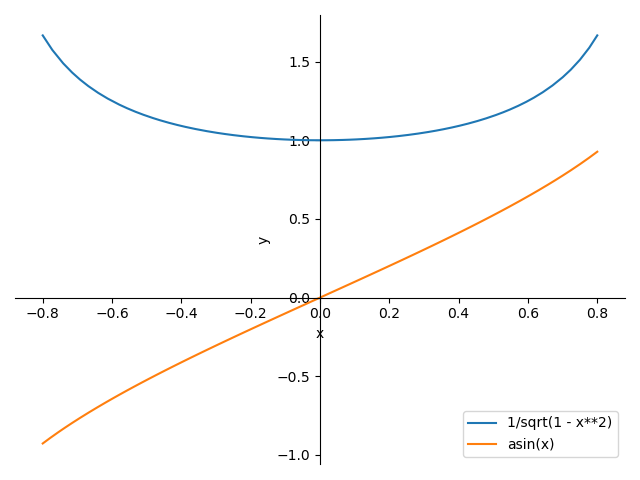

In [29]:
x = sp.symbols("x")
f = 1 / sp.sqrt(1 - x ** sp.S(2))
g = sp.integrate(f)
p = sp.plot(f, g, (x, -sp.S(4) / 5, sp.S(4) / 5), ylabel="y", legend=True)

The following test should plot your expression `f` in SymPy.

In [30]:
grader.check("sympy")

sympy results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [31]:
# extra files to submit
extra_files = ["jsxgraphs.py", "images/byte-to-decimal.dio.svg",
                    "images/decimal-to-byte.dio.svg", "images/pythagoras.dio.svg",
                    "images/quadratic.dio.svg"]

In [32]:
# Generate the source main.py necessary for grading and similarity check.
jupytext.write(jupytext.read("main.ipynb"), "main.py", fmt="py:percent")

In [33]:
# Generate the zip file to submit.
grader.export(pdf=False, run_tests=False, files=["main.py", *extra_files])